In [43]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()



,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [6]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [7]:
df.district.value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

# pricedagi objectni floatga o`tkazish

In [8]:
df['price']=df['price'].map(lambda x:float(x))

ValueError: could not convert string to float: 'Договорная'

In [9]:
df['price']=df['price'].replace('Договорная',0)

In [10]:
price_median=df['price'].median()

In [11]:
price_median

46000.0

In [12]:
df['price']=df['price'].replace(0,price_median)

In [13]:
df['price']=df['price'].map(lambda x:float(x))

# sizedagi objectni floatga o`tkazish

In [14]:
df['size']=df['size'].map(lambda x:float(x))

ValueError: could not convert string to float: 'Площадьземли:1сот'

In [15]:
df['size']=df['size'].replace('Площадьземли:1сот',0)

In [16]:
size_median=df['size'].median()
size_median

66.0

In [17]:
df['size']=df['size'].replace(0,size_median)

In [18]:
df['size']=df['size'].map(lambda x:float(x))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7565 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


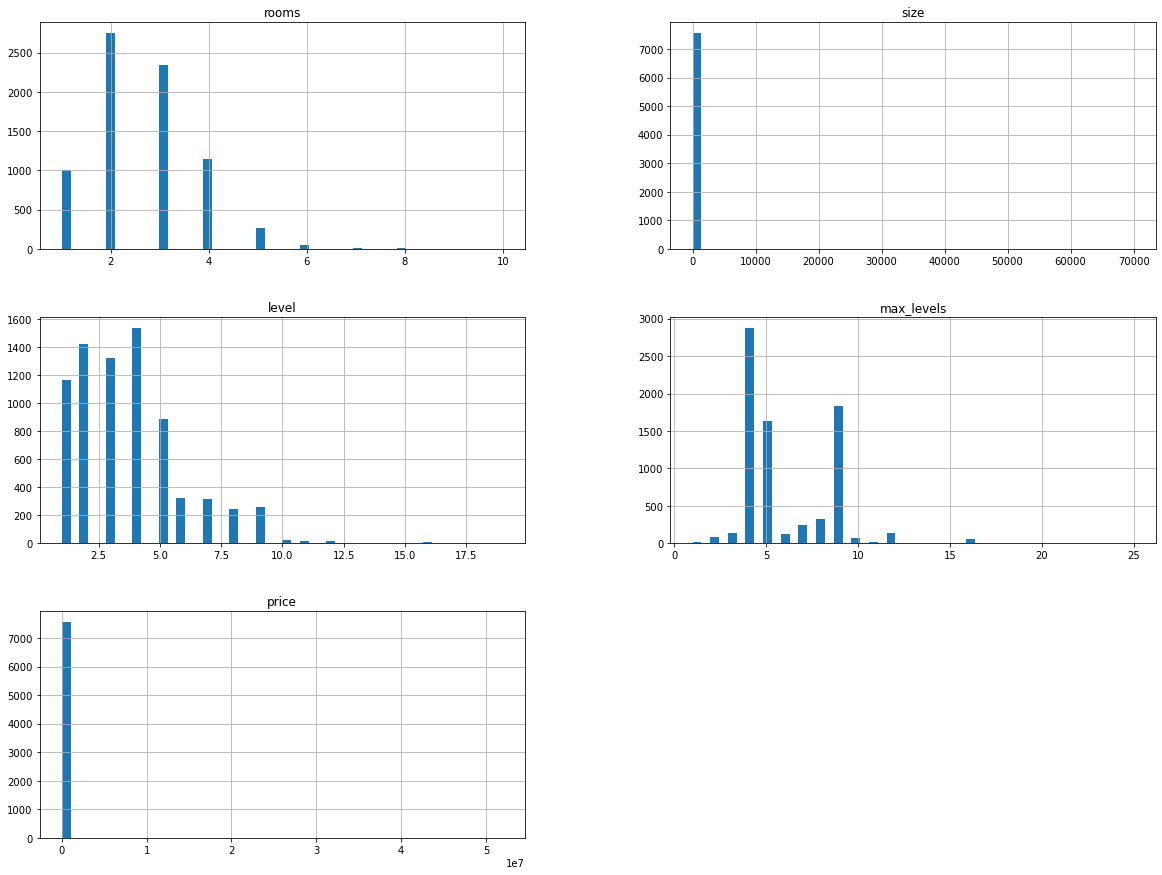

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15));

In [21]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.10,random_state=42)

In [22]:
train_set

,location,district,rooms,size,level,max_levels,price
3399,"город Ташкент, Яккасарайский район, Бобур",Яккасарайский,4,96.0,9,9,52000.0
6875,"город Ташкент, Мирабадский район, Куйлюк 4-й к...",Мирабадский,2,68.0,3,9,33000.0
4927,"город Ташкент, Яккасарайский район, Конституция",Яккасарайский,2,53.0,4,5,46000.0
1575,"город Ташкент, Юнусабадский район, Юнусабад 19...",Юнусабадский,5,125.0,4,9,67000.0
1662,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,3,82.0,3,4,120000.0
...,...,...,...,...,...,...,...
5191,"город Ташкент, Юнусабадский район, Юнусабад 11...",Юнусабадский,3,70.0,4,4,43500.0
5226,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,4,92.0,9,9,56000.0
5390,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,49.0,1,3,58500.0
860,"город Ташкент, Шайхантахурский район, Лабзак",Шайхантахурский,2,60.0,3,4,53000.0


In [23]:
test_set

,location,district,rooms,size,level,max_levels,price
132,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,2,37.0,1,4,41000.0
3771,"город Ташкент, Сергелийский район, Сергели-I Я...",Сергелийский,1,39.0,5,5,21000.0
65,"город Ташкент, Учтепинский район, Чиланзар 15-...",Учтепинский,4,110.0,3,3,91000.0
7525,"город Ташкент, Шайхантахурский район, Алишера ...",Шайхантахурский,4,84.0,2,4,95000.0
6791,"город Ташкент, Мирабадский район, Чимкент",Мирабадский,4,100.0,3,4,88000.0
...,...,...,...,...,...,...,...
5643,"город Ташкент, Яккасарайский район, Кушбеги",Яккасарайский,3,80.0,4,5,56000.0
6135,"город Ташкент, Сергелийский район, 1-й проезд ...",Сергелийский,4,135.0,1,3,70500.0
1915,"город Ташкент, Учтепинский район, Чиланзар 26-...",Учтепинский,1,42.0,3,5,32000.0
6646,"город Ташкент, Мирзо-Улугбекский район, 1-й Па...",Мирзо-Улугбекский,7,192.0,8,9,155000.0


In [24]:
housing=df.copy()

# Korrelyasiya

In [25]:
housing.corrwith(housing['price']).sort_values(ascending=False)

price         1.000000
rooms         0.055582
max_levels    0.010852
size          0.001113
level        -0.003529
dtype: float64

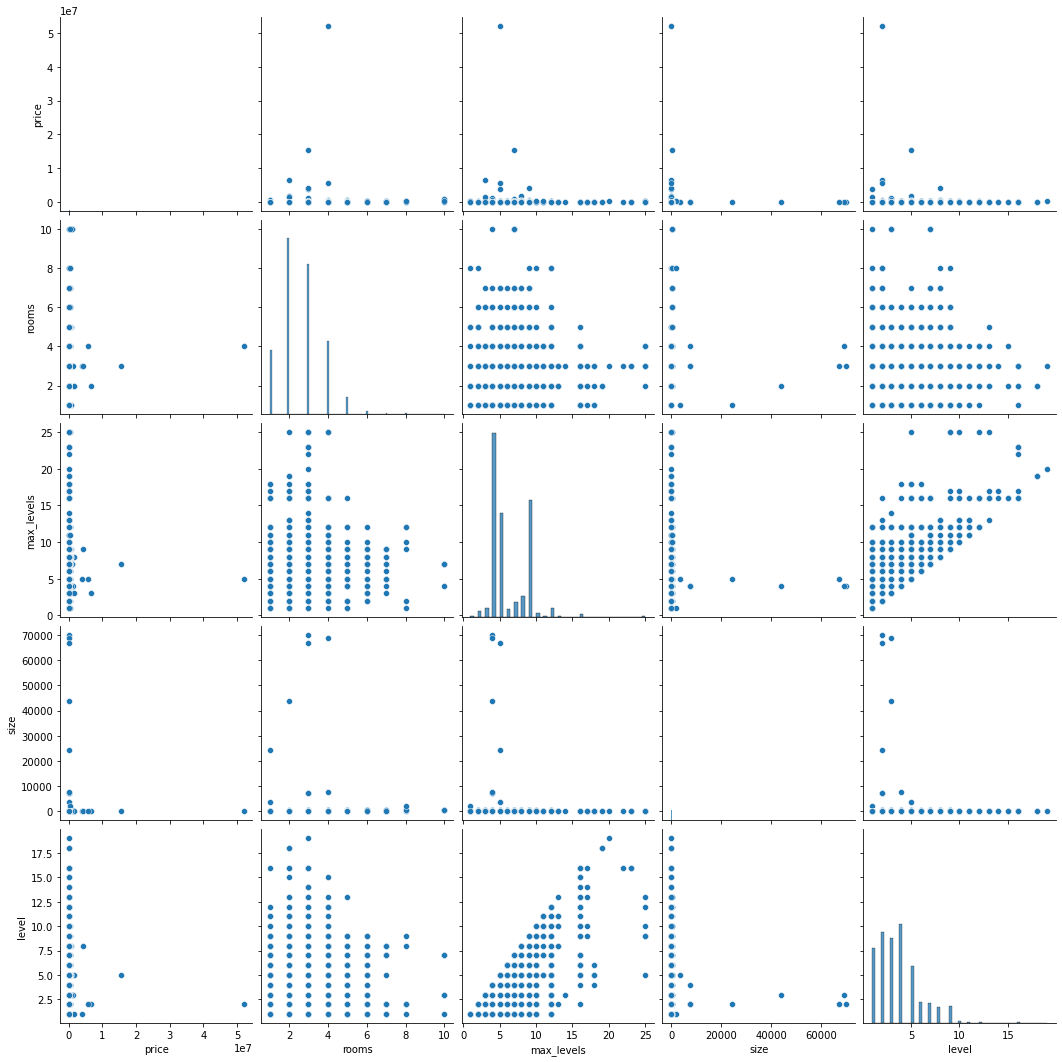

In [30]:
import seaborn as sns
cols=['price','rooms','max_levels','size',"level"]
sns.pairplot(housing[cols],height=3);


In [31]:
housing['kv_price']=housing['price']/housing['size']
housing['qavat_price']=housing['price']/housing['max_levels']

In [32]:
housing.corrwith(housing['price']).sort_values(ascending=False)

price          1.000000
qavat_price    0.991606
kv_price       0.987857
rooms          0.055582
max_levels     0.010852
size           0.001113
level         -0.003529
dtype: float64

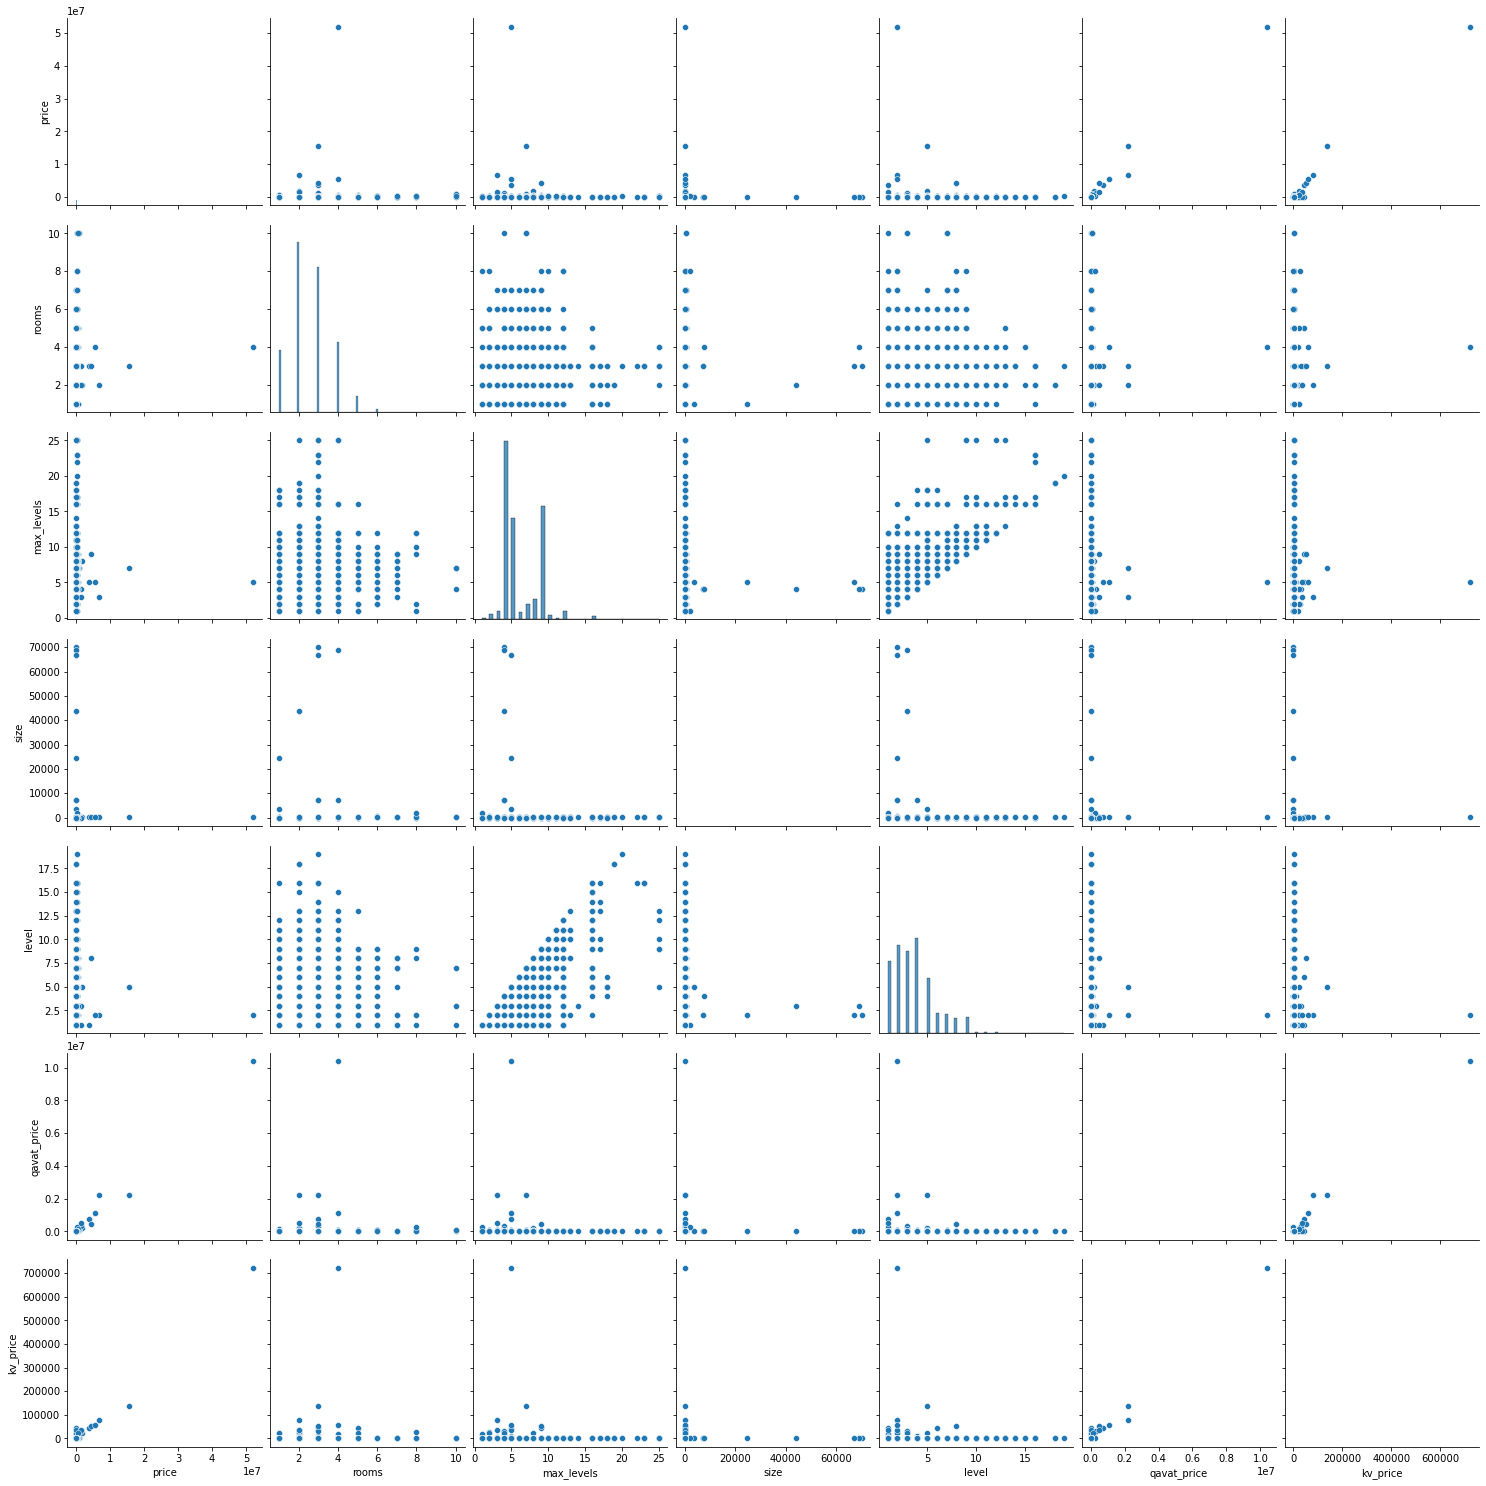

In [33]:
import seaborn as sns
cols=['price','rooms','max_levels','size',"level",'qavat_price','kv_price']
sns.pairplot(housing[cols],height=3);


# NaN qiymat mavjud bo`lsa SimpleImputer orqali MEDIAN qiymat beramiz!

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7565 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


# matnli ustunlarni shakl almashtirish

In [47]:
housing_cat=housing[['district']]

In [48]:
housing_cat["district"].head(10)

0     Юнусабадский
1    Яккасарайский
2     Чиланзарский
3     Чиланзарский
4     Чиланзарский
5     Чиланзарский
6     Чиланзарский
7    Яккасарайский
8      Учтепинский
9     Чиланзарский
Name: district, dtype: object

# # ML algoritmlar sonlar bilan ishlaydi.SHuning uchun bu ustunlarni o`zgartiramiz

buning 2 usuli bor

# 1-usul

In [49]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[8.],
       [9.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [9.],
       [5.],
       [6.]])

In [50]:
ordinal_encoder.categories_

[array(['Бектемирский', 'Мирабадский', 'Мирзо-Улугбекский', 'Олмазорский',
        'Сергелийский', 'Учтепинский', 'Чиланзарский', 'Шайхантахурский',
        'Юнусабадский', 'Яккасарайский', 'Янгихаётский', 'Яшнободский'],
       dtype=object)]

# 2-usul

In [51]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
housing_cat.head(10)

,district
0,Юнусабадский
1,Яккасарайский
2,Чиланзарский
3,Чиланзарский
4,Чиланзарский
5,Чиланзарский
6,Чиланзарский
7,Яккасарайский
8,Учтепинский
9,Чиланзарский


In [53]:
house_num = housing.drop('district',axis=1)

#  Standard Scaler - standartlash

In [54]:
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()
standart_scaler.fit_transform(house_num)

array([[ 3.44987171e-01, -3.77319924e-02,  1.34425536e-01, ...,
        -2.98651429e-02, -5.82247856e-03, -7.11289618e-04],
       [-5.76562245e-01, -4.10851877e-02,  1.34425536e-01, ...,
        -2.35786286e-02,  1.32888166e-02, -1.49721864e-02],
       [-5.76562245e-01, -4.77915784e-02,  1.34425536e-01, ...,
        -5.34395718e-02, -9.45899549e-03, -3.04214913e-02],
       ...,
       [-5.76562245e-01, -3.30375190e-02, -3.12576302e-01, ...,
        -4.87246860e-02, -3.91693388e-02, -6.84945646e-02],
       [-1.49811166e+00, -6.38869159e-02, -1.20657998e+00, ...,
        -9.43019152e-02, -4.07815280e-02, -8.19191742e-02],
       [-1.49811166e+00, -5.58392472e-02, -7.59578140e-01, ...,
        -7.55775322e-02, -2.30577651e-02, -5.83213514e-02]])

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
scaler.fit_transform(house_num)

array([[ 3.44987171e-01, -3.77319924e-02,  1.34425536e-01, ...,
        -2.98651429e-02, -5.82247856e-03, -7.11289618e-04],
       [-5.76562245e-01, -4.10851877e-02,  1.34425536e-01, ...,
        -2.35786286e-02,  1.32888166e-02, -1.49721864e-02],
       [-5.76562245e-01, -4.77915784e-02,  1.34425536e-01, ...,
        -5.34395718e-02, -9.45899549e-03, -3.04214913e-02],
       ...,
       [-5.76562245e-01, -3.30375190e-02, -3.12576302e-01, ...,
        -4.87246860e-02, -3.91693388e-02, -6.84945646e-02],
       [-1.49811166e+00, -6.38869159e-02, -1.20657998e+00, ...,
        -9.43019152e-02, -4.07815280e-02, -8.19191742e-02],
       [-1.49811166e+00, -5.58392472e-02, -7.59578140e-01, ...,
        -7.55775322e-02, -2.30577651e-02, -5.83213514e-02]])

# MACHINE LEARNING

In [57]:
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [59]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   district     7565 non-null   object 
 1   rooms        7565 non-null   int64  
 2   size         7565 non-null   float64
 3   level        7565 non-null   int64  
 4   max_levels   7565 non-null   int64  
 5   price        7565 non-null   float64
 6   kv_price     7565 non-null   float64
 7   qavat_price  7565 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 472.9+ KB


In [60]:
housing.head()

,district,rooms,size,level,max_levels,price,kv_price,qavat_price
0,Юнусабадский,3,57.0,4,4,52000.0,912.280702,13000.0
1,Яккасарайский,2,52.0,4,5,56000.0,1076.923077,11200.0
2,Чиланзарский,2,42.0,4,4,37000.0,880.952381,9250.0
3,Чиланзарский,3,65.0,1,4,49500.0,761.538462,12375.0
4,Чиланзарский,3,70.0,3,5,55000.0,785.714286,11000.0


In [61]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.pipeline import Pipeline 

In [62]:
train_set , test_set = train_test_split(housing , test_size = 0.1 , random_state = 42)

train_set.shape



(6808, 8)

In [64]:
train_set.shape

(6808, 8)

In [65]:
test_set.shape

(757, 8)

In [66]:
x_train = train_set.drop('price',axis=1)
y= train_set['price'].copy()

x_num = x_train.drop('district',axis=1)

# pipline

In [75]:
num_pipeline=Pipeline([
    ('simple',SimpleImputer(strategy='median')),
    ("standard",StandardScaler())
])

In [76]:
num_pipeline.fit_transform(x_num)

array([[ 1.26570754e+00, -7.68737459e-03,  2.37607259e+00,
         1.14589833e+00, -4.85235445e-02, -5.69705961e-02],
       [-5.78671084e-01, -2.70165877e-02, -3.11169592e-01,
         1.14589833e+00, -5.47316047e-02, -7.28408922e-02],
       [-5.78671084e-01, -3.73715233e-02,  1.36704104e-01,
        -3.97762483e-01, -1.25942053e-02, -3.12440109e-02],
       ...,
       [-5.78671084e-01, -4.01328394e-02, -1.20691699e+00,
        -1.16959289e+00,  2.33015634e-02,  4.61863284e-02],
       [-5.78671084e-01, -3.25392200e-02, -3.11169592e-01,
        -7.83677686e-01, -1.08973015e-02, -7.98100793e-04],
       [ 3.43518228e-01, -1.04486907e-02, -7.59043289e-01,
         1.14589833e+00, -4.83240416e-02, -5.86411536e-02]])

In [77]:
from sklearn.compose import ColumnTransformer

num = list(x_num)
strlar = ['district']

In [79]:
strlar

['district']

In [80]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num),
    ('str',OneHotEncoder(),strlar)
])

In [81]:
x_prepared = full_pipeline.fit_transform(x_train)

In [82]:
x_prepared

array([[ 1.26570754, -0.00768737,  2.37607259, ...,  1.        ,
         0.        ,  0.        ],
       [-0.57867108, -0.02701659, -0.31116959, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57867108, -0.03737152,  0.1367041 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.57867108, -0.04013284, -1.20691699, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57867108, -0.03253922, -0.31116959, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34351823, -0.01044869, -0.75904329, ...,  0.        ,
         0.        ,  0.        ]])

In [88]:
y[:7]

3399     52000.0
6875     33000.0
4927     46000.0
1575     67000.0
1662    120000.0
7326     38000.0
500      74000.0
Name: price, dtype: float64

# LinearRegression

In [89]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [91]:
LR_model.fit(x_prepared , y)

LinearRegression()

# DecisionTree

In [92]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor()

In [93]:
DT_model.fit(x_prepared , y)

DecisionTreeRegressor()

# RandomForest

In [94]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()

In [95]:
RF_model.fit(x_prepared, y)

RandomForestRegressor()

# Test Model

In [96]:
from sklearn.metrics import mean_absolute_error
x_test = test_set.drop('price' ,axis=1)
y_test = test_set['price'].copy()

In [97]:
x_test_prepared = full_pipeline.fit_transform(x_test)

# 1-usul

In [98]:
linear = LR_model.predict(x_test_prepared)

In [99]:
pd.DataFrame({"make:":linear,"orginal:":y_test})

,make:,orginal:
132,2.845443e+05,41000.0
3771,-5.097052e+05,21000.0
65,1.186639e+06,91000.0
7525,1.083095e+06,95000.0
6791,7.834976e+05,88000.0
...,...,...
5643,2.999719e+04,56000.0
6135,5.649631e+05,70500.0
1915,-2.089966e+05,32000.0
6646,5.057949e+05,155000.0


In [101]:
import numpy as np
a = mean_absolute_error(y_test,linear)
linear_error = np.sqrt(a)
linear_error

603.5534478821148

# 2-usul

In [102]:


tree = DT_model.predict(x_test_prepared)



In [103]:
tree

array([2.7000e+04, 7.3000e+03, 1.3440e+06, 2.3000e+05, 6.4400e+05,
       7.3000e+03, 7.3000e+03, 5.6000e+04, 1.0000e+04, 2.8640e+03,
       3.0000e+05, 3.5000e+04, 1.0000e+04, 1.3067e+04, 2.4000e+03,
       1.0000e+04, 4.5000e+04, 3.7500e+05, 1.2500e+05, 8.9990e+03,
       1.3067e+04, 4.2000e+05, 1.3067e+04, 2.4000e+03, 1.2500e+05,
       7.3000e+03, 7.3000e+03, 8.9990e+03, 2.3000e+05, 4.8499e+04,
       4.2400e+06, 2.8640e+03, 1.7000e+04, 1.0000e+04, 1.0000e+04,
       7.3000e+03, 4.4500e+04, 2.9500e+05, 6.4400e+05, 7.3000e+03,
       8.0000e+03, 7.3000e+03, 1.0000e+04, 1.0000e+04, 8.9990e+03,
       8.9990e+03, 1.4000e+05, 4.2400e+06, 8.9990e+03, 1.3067e+04,
       2.3000e+05, 6.4400e+05, 1.4500e+04, 2.0000e+00, 2.8640e+03,
       2.6500e+05, 4.5000e+04, 2.8640e+03, 4.3000e+04, 5.0000e+04,
       2.3000e+05, 8.9990e+03, 2.8640e+03, 2.3000e+05, 1.3067e+04,
       6.4400e+05, 1.6660e+06, 1.3067e+04, 4.2000e+05, 2.6000e+04,
       1.3067e+04, 1.3067e+04, 8.9990e+03, 2.2500e+05, 2.8640e

In [104]:
b = mean_absolute_error(y_test,tree)
tree_error = np.sqrt(b)
tree_error

455.9642706575246

# Cross-Validation

In [106]:
X = housing.drop("price", axis=1)
y = housing["price"].copy()

X_prepared = full_pipeline.transform(X)

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
obj = cross_val_score(LR_model , X_prepared , y , scoring="neg_mean_squared_error" , cv = 7)
obj_result = np.sqrt(-obj)

In [109]:
def hisobla(a):
    print('score:',a)
    print('mean:',a.mean())
    print('std:',a.std())

In [110]:
hisobla(obj_result)

score: [ 20801.71146495  58241.75473374  24441.17914718  20825.42572665
  34087.50450314 272658.4486913  204955.05468769]
mean: 90858.725564951
std: 96050.49918674497


In [111]:
obj1 = cross_val_score(DT_model , X_prepared , y , scoring="neg_mean_squared_error" , cv = 7)
obj1_result = np.sqrt(-obj1)

In [112]:
hisobla(obj1_result)

score: [  31217.09631935  132793.03761189    7490.11261579    6719.54857762
    8770.44027351 1413061.50816222  386548.33425333]
mean: 283800.011116242
std: 478263.5240534432


In [113]:
import pickle

In [114]:
filename = 'DT_model.pk'
with open(filename , 'wb') as file:
    pickle.dump(DT_model,file)